# Step1

In [548]:
import pandas as pd
from pandas import Series as s , DataFrame as df
import numpy as np

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from matplotlib import pyplot as plt, rcParams as rc

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
rc["figure.figsize"] = 10,6


import warnings
warnings.filterwarnings("ignore") 


from sklearn.pipeline import Pipeline



from xgboost import XGBRegressor , XGBRFRegressor

import lightgbm


from catboost import CatBoostRegressor




import datetime

import datetime as dt

In [549]:
#Note : y_test = y_true and predict_x = y_pred

def mean_absolute_percentage_error(y_true, y_pred) :
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(          np.abs(  (y_true - y_pred) / 100)         ) * 100



def root_mean_sequare_error(y_true, y_pred) :
    
    mse = mean_squared_error(y_true,  y_pred)
    
    rmse = np.sqrt(mse)
    
    return rmse



def create_season1(x):
    if x == 2 or x == 3:
        season1 = "spring"
            
    elif x == 4 or x == 5 or x ==  6:
        season1 = "summer"
            
    elif x == 7 or x == 8 or x == 8:
        season1 = "rainy"
            
    elif x == 10 or x == 11 or x == 12 or x == 1:
        season1 = "winter"
           
    return season1




def create_season(x):
    if (x == 3) or (x == 4) or (x == 5):
        season = "spring"
            
    elif x == 6 or x == 7 or x ==  8:
        season = "summer"
            
    elif x == 9 or x == 10 or x == 11:
        season = "autumn"
            
    elif x == 12 or x == 1 or x == 2:
        season = "winter"
        
    return season

In [550]:
# train_segment_1.month.apply( lambda x : create_season(x))


# train_segment_1.month.apply( lambda x : create_season1(x)) # why error?

In [551]:
test = pd.read_csv("test_1eLl9Yf.csv")
train = pd.read_csv("train_fwYjLYX.csv")
smaple_submission = pd.read_csv("sample_submission_IIzFVsf.csv")

In [552]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
id                  180 non-null int64
application_date    180 non-null object
segment             180 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [553]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [554]:
test.head(2)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1


In [555]:
train.head(1)

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0


In [556]:
train["ds"] = "train"
test["ds"] = "test"

final = pd.concat([  train, test ])

In [557]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 0 to 179
Data columns (total 8 columns):
application_date    80582 non-null object
branch_id           66898 non-null float64
case_count          80402 non-null float64
ds                  80582 non-null object
id                  180 non-null float64
segment             80582 non-null int64
state               80402 non-null object
zone                66898 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 5.5+ MB


In [660]:
final.isna().sum()

application_date        0
branch_id           13684
case_count            180
ds                      0
id                  80402
segment                 0
state                 180
zone                13684
dtype: int64

In [558]:
final.head(2)

,application_date,branch_id,case_count,ds,id,segment,state,zone
0,2017-04-01,1.0,40.0,train,NaN,1,WEST BENGAL,EAST
1,2017-04-03,1.0,5.0,train,NaN,1,WEST BENGAL,EAST


In [559]:
final1 = final.groupby(   ["application_date"] , as_index=False)["case_count"].sum()
final1.head(2)

,application_date,case_count
0,2017-04-01,1196.0
1,2017-04-02,605.0


In [560]:
 final1.shape

(937, 2)

In [561]:
final2 = final.groupby(   ["application_date" ,  "segment"] , as_index=False)["case_count"].sum()
final2.head(2)

,application_date,segment,case_count
0,2017-04-01,1,299.0
1,2017-04-01,2,897.0


In [562]:
final2.shape

(1830, 3)

In [563]:
final3 = final.groupby(   ["application_date" ,  "segment" , "ds"] , as_index=False)["case_count"].sum()
final3.head(2)

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
1,2017-04-01,2,train,897.0


In [564]:
final3.shape

(1830, 4)

In [565]:
final4 = final.groupby(   ["application_date" ,  "segment" , "state"] , as_index=False)["case_count"].sum()
final4.head(2)

,application_date,segment,state,case_count
0,2017-04-01,1,ANDHRA PRADESH,0.0
1,2017-04-01,1,ASSAM,17.0


In [566]:
final4.shape

(29624, 4)

In [567]:
final5 = final.groupby(   ["application_date" ,  "segment" , "state" , "zone"] , as_index=False)["case_count"].sum()
final5.head(2)

,application_date,segment,state,zone,case_count
0,2017-04-01,1,ANDHRA PRADESH,SOUTH,0.0
1,2017-04-01,1,ASSAM,EAST,17.0


In [568]:
final5.shape

(16926, 5)

In [569]:
final6 = final.groupby(   ["application_date" ,  "segment" , "zone"] , as_index=False)["case_count"].sum()
final6.head(2)

,application_date,segment,zone,case_count
0,2017-04-01,1,CENTRAL,7.0
1,2017-04-01,1,EAST,117.0


In [570]:
final6.shape

(4030, 4)

In [571]:
final_data=final.groupby(['application_date','segment','ds'],as_index=False)['case_count'].sum()
final_data.head(2)

,application_date,segment,ds,case_count
0,2017-04-01,1,train,299.0
1,2017-04-01,2,train,897.0


In [572]:
final_data.shape

(1830, 4)

In [573]:
final_data["application_date"] = pd.to_datetime(final_data["application_date"])

In [574]:
final_data["year"] = final_data["application_date"].dt.year

final_data["month"] = final_data["application_date"].dt.month

final_data["week"] = final_data["application_date"].dt.week

final_data["day"] = final_data["application_date"].dt.day

In [575]:
final_data.head(2)

,application_date,segment,ds,case_count,year,month,week,day
0,2017-04-01,1,train,299.0,2017,4,13,1
1,2017-04-01,2,train,897.0,2017,4,13,1


In [576]:
train_segment_1 = final_data[final_data.segment == 1]

train_segment_2 = final_data[final_data.segment == 2]

In [577]:
train_segment_1.shape, train_segment_2.shape

((893, 8), (937, 8))

In [578]:
# date_pattern = "%Y-%m-%d"


# train_segment_1["year"] = train_segment_1.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).year)
# train_segment_1["month"] = train_segment_1.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).month)
# train_segment_1["day"] = train_segment_1.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).day)
# train_segment_1["week"] = train_segment_1.application_date.apply(lambda x : datetime.datetime.strptime(x, date_pattern).week)





In [579]:
list1=[]
for x in train_segment_1['month']:
    if x==2 or x==3:
            y='spring'
    elif x==4 or x==5 or x==6:
            y='summer'
    elif x==7 or x==8 or x==9:
           y='rainy'
    elif x==10 or x==11 or x==12 or x==1:
            y='winter'
    list1.append(y)
    
    
list2=[]
for x in train_segment_2['month']:
    if x==2 or x==3:
            y='spring'
    elif x==4 or x==5 or x==6:
            y='summer'
    elif x==7 or x==8 or x==9:
           y='rainy'
    elif x==10 or x==11 or x==12 or x==1:
            y='winter'
    list2.append(y)
    

In [580]:
# train_segment_1["season"] = train_segment_1.month.apply( lambda x : create_season(x))

# train_segment_2["season"] = train_segment_2.month.apply( lambda x : create_season(x))






train_segment_1["season"] = list1

train_segment_2["season"] = list2


In [581]:
train_segment_1.shape, train_segment_2.shape

((893, 9), (937, 9))

In [582]:
train_segment_1.head(2)

,application_date,segment,ds,case_count,year,month,week,day,season
0,2017-04-01,1,train,299.0,2017,4,13,1,summer
3,2017-04-03,1,train,42.0,2017,4,14,3,summer


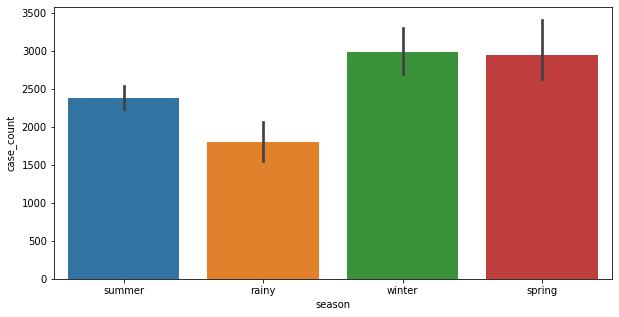

In [583]:
plt.figure(  figsize=(10, 5))
sns.barplot( x = "season" , y = "case_count" , data=train_segment_1  )
plt.show()

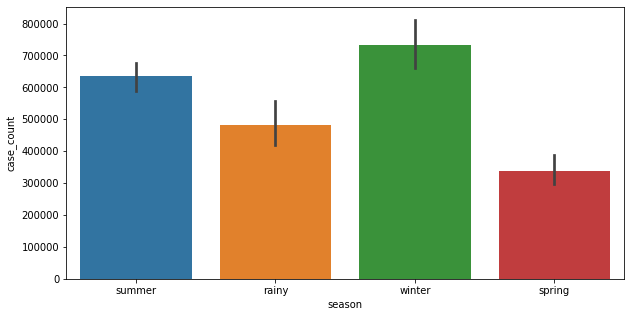

In [584]:
plt.figure(  figsize=(10, 5))
sns.barplot( x = "season" , y = "case_count" , data=train_segment_1, estimator=sum  )
plt.show()

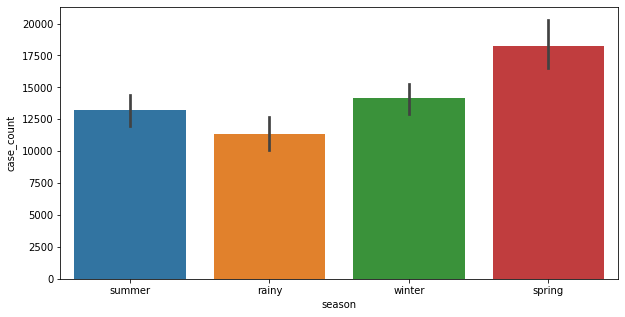

In [585]:
plt.figure(  figsize=(10, 5))
sns.barplot( x = "season" , y = "case_count" , data=train_segment_2  )
plt.show()

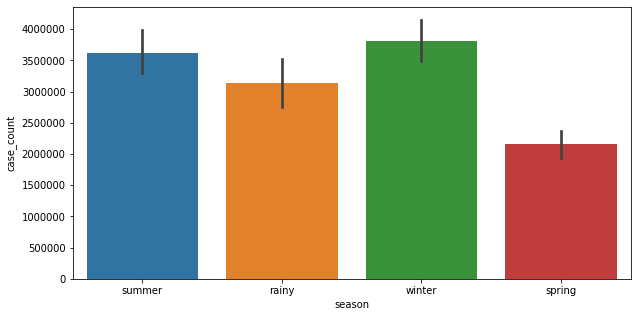

In [586]:
plt.figure(  figsize=(10, 5))
sns.barplot( x = "season" , y = "case_count" , data=train_segment_2, estimator=sum  )
plt.show()

In [587]:
pd.get_dummies(train_segment_1.season)

,rainy,spring,summer,winter
0,0,0,1,0
3,0,0,1,0
5,0,0,1,0
7,0,0,1,0
10,0,0,1,0
...,...,...,...,...
1796,1,0,0,0
1798,1,0,0,0
1800,1,0,0,0
1802,1,0,0,0


In [588]:
season_val_1 = pd.get_dummies(train_segment_1.season)

train_segment_1 = pd.concat(  [train_segment_1,   season_val_1 ] , axis= 1 )




In [589]:
season_val_2 = pd.get_dummies(train_segment_2.season)

train_segment_2 = pd.concat(  [train_segment_2,   season_val_2 ] , axis= 1 )

In [590]:
train_segment_1.head(2)

,application_date,segment,ds,case_count,year,month,week,day,season,rainy,spring,summer,winter
0,2017-04-01,1,train,299.0,2017,4,13,1,summer,0,0,1,0
3,2017-04-03,1,train,42.0,2017,4,14,3,summer,0,0,1,0


In [591]:
train_segment_1.shape , train_segment_2.shape

((893, 13), (937, 13))

In [592]:
train_segment_min_max_1 = train_segment_1.groupby(   ["week" ,  "year"], as_index=False)["case_count"].agg({ "week_min" : np.min , "week_max" : np.max })


train_segment_min_max_2 = train_segment_2.groupby(   ["week" ,  "year"], as_index=False)["case_count"].agg({ "week_min" : np.min , "week_max" : np.max })

In [593]:
train_segment_1.shape , train_segment_2.shape

((893, 13), (937, 13))

In [594]:
train_segment_min_max_1.head(5)

,week,year,week_min,week_max
0,1,2018,45.0,8116.0
1,1,2019,125.0,3946.0
2,2,2018,81.0,2757.0
3,2,2019,1815.0,3377.0
4,3,2018,1108.0,2947.0


In [595]:
train_segment_min_max_1.shape , train_segment_min_max_2.shape

((132, 4), (135, 4))

In [596]:
train_segment_1.shape , train_segment_2.shape

((893, 13), (937, 13))

In [597]:
train_segment_1 = pd.merge(train_segment_1 , train_segment_min_max_1 , on = ["year" , "week"])

In [598]:
train_segment_2 = pd.merge(train_segment_2 , train_segment_min_max_2 , on = ["year" , "week"])

In [599]:
train_segment_1.shape , train_segment_2.shape

((893, 15), (937, 15))

In [600]:
train_segment_1.head(2)

,application_date,segment,ds,case_count,year,month,week,day,season,rainy,spring,summer,winter,week_min,week_max
0,2017-04-01,1,train,299.0,2017,4,13,1,summer,0,0,1,0,299.0,299.0
1,2017-04-03,1,train,42.0,2017,4,14,3,summer,0,0,1,0,23.0,1530.0


In [601]:
train_segment_1.shape , train_segment_2.shape

((893, 15), (937, 15))

In [602]:
train_segment_min_max_1 = train_segment_1.groupby(   ["month" ,  "year"], as_index=False)["case_count"].agg({ "month_min" : np.min , "month_max" : np.max })


train_segment_min_max_2 = train_segment_2.groupby(   ["month" ,  "year"], as_index=False)["case_count"].agg({ "month_min" : np.min , "month_max" : np.max })

In [603]:
train_segment_min_max_1.shape , train_segment_min_max_2.shape

((30, 4), (31, 4))

In [604]:
train_segment_1.shape , train_segment_2.shape

((893, 15), (937, 15))

In [605]:
train_segment_1 = pd.merge(train_segment_1 , train_segment_min_max_1 , on = ["year" , "month"])

train_segment_2 = pd.merge(train_segment_2 , train_segment_min_max_2 , on = ["year" , "month"])

In [606]:
train_segment_1.shape , train_segment_2.shape

((893, 17), (937, 17))

# Step2

In [607]:
train_segment_1.shape, train_segment_2.shape

((893, 17), (937, 17))

In [608]:
train_segment_1.columns

Index(['application_date', 'segment', 'ds', 'case_count', 'year', 'month',
       'week', 'day', 'season', 'rainy', 'spring', 'summer', 'winter',
       'week_min', 'week_max', 'month_min', 'month_max'],
      dtype='object')

In [609]:
train_segment_1.drop("season", axis=1, inplace=True)

In [610]:
train_segment_2.drop("season", axis=1).head(2)

,application_date,segment,ds,case_count,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,2017-04-01,2,train,897.0,2017,4,13,1,0,0,1,0,605.0,897.0,605.0,12384.0
1,2017-04-02,2,train,605.0,2017,4,13,2,0,0,1,0,605.0,897.0,605.0,12384.0


In [611]:
train_segment_2.drop("season", axis=1, inplace=True)

In [612]:
train_segment_1[ train_segment_1.ds == "train"  ].head(2)

,application_date,segment,ds,case_count,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,2017-04-01,1,train,299.0,2017,4,13,1,0,0,1,0,299.0,299.0,23.0,6472.0
1,2017-04-03,1,train,42.0,2017,4,14,3,0,0,1,0,23.0,1530.0,23.0,6472.0


In [613]:
new_train_segment_1 = train_segment_1[ train_segment_1.ds == "train"  ]

new_test_segment_1 = train_segment_1[ train_segment_1.ds == "test"  ]





new_train_segment_2 = train_segment_2[ train_segment_2.ds == "train"  ]

new_test_segment_2 = train_segment_2[ train_segment_2.ds == "test"  ]

In [614]:
new_test_segment_1.shape , new_train_segment_1.shape

((87, 16), (806, 16))

In [615]:
new_test_segment_2.shape , new_train_segment_2.shape

((93, 16), (844, 16))

In [617]:
test[87:179]

,id,application_date,segment,ds
87,88,2019-07-24,2,test
88,89,2019-07-25,2,test
89,90,2019-07-26,2,test
90,91,2019-07-27,2,test
91,92,2019-07-28,2,test
...,...,...,...,...
174,175,2019-10-19,2,test
175,176,2019-10-20,2,test
176,177,2019-10-21,2,test
177,178,2019-10-22,2,test


In [618]:
submission_segment_2.shape, submission_segment_1.shape

((93, 2), (87, 2))

# Step3

In [619]:
train_segment_1.shape

(893, 16)

In [620]:
train_segment_1.columns

Index(['application_date', 'segment', 'ds', 'case_count', 'year', 'month',
       'week', 'day', 'rainy', 'spring', 'summer', 'winter', 'week_min',
       'week_max', 'month_min', 'month_max'],
      dtype='object')

In [ ]:
[ 'segment', 'year', 'month','week', 'day', 'rainy', 'spring', 'summer', 'winter', 'week_min','week_max', 'month_min', 'month_max']

In [545]:
train_segment_1.head(2)

,application_date,segment,ds,case_count,year,month,week,day,rainy,spring,summer,winter,week_min,week_max
0,2017-04-01,1,train,299.0,2017,4,13,1,0,0,1,0,299.0,299.0
1,2017-04-03,1,train,42.0,2017,4,14,3,0,0,1,0,23.0,1530.0


In [623]:
feature1 = [ 'segment', 'year', 'month','week', 'day', 'rainy', 'spring', 'summer', 'winter', 'week_min','week_max', 'month_min', 'month_max'] 


In [624]:
x1 = train_segment_1.loc[: , feature1]
y1 = train_segment_1.loc[:, "case_count"]


x2 =  train_segment_2.loc[: , feature1]
y2 =  train_segment_2.loc[:, "case_count"]


In [636]:
x2.head(1)

,segment,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,2,2017,4,13,1,0,0,1,0,605.0,897.0,605.0,12384.0


In [637]:
y2.head(1)

0    897.0
Name: case_count, dtype: float64

In [625]:
x1.shape , x2.shape , y1.shape, y2.shape

((893, 13), (937, 13), (893,), (937,))

In [628]:
x_train1, x_test1 , y_train1 , y_test1 = train_test_split(x1, y1, random_state = 20, test_size = .25)

x_train2, x_test2 , y_train2 , y_test2 = train_test_split(x2, y2, random_state = 20, test_size = .25)

In [632]:
x_train1.shape , x_test1.shape , y_train1.shape, y_test1.shape

((669, 13), (224, 13), (669,), (224,))

In [633]:
x_train2.shape , x_test2.shape , y_train2.shape, y_test2.shape

((702, 13), (235, 13), (702,), (235,))

In [643]:
rf1 = RandomForestRegressor()
rf1.fit(x_train1, y_train1)
pred_y_1 = rf1.predict(x_test1)


mae_1 = mean_absolute_error(y_test1 , pred_y_1)
mpae_1 = mean_absolute_percentage_error(y_test1 , pred_y_1)
mse_1 = mean_squared_error(y_test1 , pred_y_1)
rmse_1 = root_mean_sequare_error(y_test1 , pred_y_1)
accuracy_1 = r2_score(y_test1 , pred_y_1)



print("\n mae_1            : ", mae_1)
print("\n mpae_1           : ", mpae_1)
print("\n mse_1            : ", mse_1)
print("\n rmse_1           : ", rmse_1)
print("\n accuracy_1       : ", accuracy_1)


 mae_1            :  634.1843749999999

 mpae_1           :  634.1843749999999

 mse_1            :  1098203.6211160715

 rmse_1           :  1047.9521082168171

 accuracy_1       :  0.7829592745892614


In [644]:
rf2 = RandomForestRegressor()
rf2.fit(x_train2, y_train2)
pred_y_2 = rf2.predict(x_test2)


mae_2 = mean_absolute_error(y_test2 , pred_y_2)
mpae_2 = mean_absolute_percentage_error(y_test1 , pred_y_1)
mse_2 = mean_squared_error(y_test2 , pred_y_2)
rmse_2 = root_mean_sequare_error(y_test2 , pred_y_2)
accuracy_2 = r2_score(y_test2 , pred_y_2)



print("\n mae_2            : ", mae_2)
print("\n mpae_2           : ", mpae_2)
print("\n mse_2            : ", mse_2)
print("\n rmse_2           : ", rmse_2)
print("\n accuracy_2       : ", accuracy_2)


 mae_2            :  2432.8051063829785

 mpae_2           :  634.1843749999999

 mse_2            :  14605607.12774468

 rmse_2           :  3821.7282906748724

 accuracy_2       :  0.8770284262064166


# Step 4

In [655]:
submission_segment_1 = pd.DataFrame()

submission_segment_1["id"] = test[0:87]["id"]

submission_segment_1["application_date"] = test[0:87]["application_date"]



submission_segment_2 = pd.DataFrame()

submission_segment_2["id"] = test[87:180]["id"]

submission_segment_2["application_date"] = test[87:180]["application_date"]


In [656]:
test[87: 180 ]

,id,application_date,segment,ds
87,88,2019-07-24,2,test
88,89,2019-07-25,2,test
89,90,2019-07-26,2,test
90,91,2019-07-27,2,test
91,92,2019-07-28,2,test
...,...,...,...,...
175,176,2019-10-20,2,test
176,177,2019-10-21,2,test
177,178,2019-10-22,2,test
178,179,2019-10-23,2,test


In [657]:
smaple_submission.columns

Index(['id', 'application_date', 'segment', 'case_count'], dtype='object')

In [659]:
pred_y_1.size

224

In [662]:
# submission_segment_1["case_count"] = pred_y_1

# submission_segment_2["case_count"] = pred_y_2

# Submit

In [684]:
xgbRegressor_1 = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=None, n_estimators=10000, nthread=-1,
       objective='reg:linear', reg_alpha=0.75, reg_lambda=0.45,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.6)

xgbRegressor_2 = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=None, n_estimators=10000, nthread=-1,
       objective='reg:linear', reg_alpha=0.75, reg_lambda=0.45,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.6)

In [713]:
lgbm_1 = lightgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, num_boost_round=5000,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [697]:
new_train_segment_1 = train_segment_1[ train_segment_1.ds == "train"  ]

new_test_segment_1 = train_segment_1[ train_segment_1.ds == "test"  ]





new_train_segment_2 = train_segment_2[ train_segment_2.ds == "train"  ]

new_test_segment_2 = train_segment_2[ train_segment_2.ds == "test"  ]

In [699]:
new_test_segment_1.shape

(87, 16)

In [698]:
new_test_segment_1.head(1)

,application_date,segment,ds,case_count,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
806,2019-07-06,1,test,0.0,2019,7,27,6,1,0,0,0,0.0,4240.0,0.0,4240.0


In [682]:
test_segment_final_1.shape , test_segment_final_2.shape

((87, 4), (93, 4))

In [667]:
addRandxomStateForAlgorithm(x1, y1,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_up_to_10)

      Model_name  Random_state  Accuracy    MAPE     MAE         MSE     RMSE 
0   XGBRegressor             0      72.0   625.09  625.09   901940.97   949.71
1   XGBRegressor             1      45.0   882.75  882.75  2613684.16  1616.69
2   XGBRegressor             2      70.0   821.07  821.07  1961351.70  1400.48
3   XGBRegressor             3      77.0   723.66  723.66  1259322.76  1122.20
4   XGBRegressor             4      51.0   676.55  676.55  1482148.88  1217.44
5   XGBRegressor             5      37.0   797.44  797.44  1941529.82  1393.39
6   XGBRegressor             6      55.0   830.19  830.19  1970419.11  1403.72
7   XGBRegressor             7      60.0   856.21  856.21  2332650.67  1527.30
8   XGBRegressor             8      16.0   856.67  856.67  2334865.10  1528.03
9   XGBRegressor             9      45.0   712.34  712.34  1560242.02  1249.10
10  XGBRegressor            10      61.0   778.16  778.16  1607921.16  1268.04


## fianl Segment 1

In [683]:
submission_segment_1 = pd.DataFrame()

submission_segment_1["id"] = test[0:87]["id"]

submission_segment_1["application_date"] = test[0:87]["application_date"]

In [667]:
addRandxomStateForAlgorithm(x1, y1,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_up_to_10)

      Model_name  Random_state  Accuracy    MAPE     MAE         MSE     RMSE 
0   XGBRegressor             0      72.0   625.09  625.09   901940.97   949.71
1   XGBRegressor             1      45.0   882.75  882.75  2613684.16  1616.69
2   XGBRegressor             2      70.0   821.07  821.07  1961351.70  1400.48
3   XGBRegressor             3      77.0   723.66  723.66  1259322.76  1122.20
4   XGBRegressor             4      51.0   676.55  676.55  1482148.88  1217.44
5   XGBRegressor             5      37.0   797.44  797.44  1941529.82  1393.39
6   XGBRegressor             6      55.0   830.19  830.19  1970419.11  1403.72
7   XGBRegressor             7      60.0   856.21  856.21  2332650.67  1527.30
8   XGBRegressor             8      16.0   856.67  856.67  2334865.10  1528.03
9   XGBRegressor             9      45.0   712.34  712.34  1560242.02  1249.10
10  XGBRegressor            10      61.0   778.16  778.16  1607921.16  1268.04


In [685]:
train_segment_1.shape

(893, 16)

In [686]:
train_segment_1.head(1)

,application_date,segment,ds,case_count,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,2017-04-01,1,train,299.0,2017,4,13,1,0,0,1,0,299.0,299.0,23.0,6472.0


In [700]:
train_segment_1.columns

Index(['application_date', 'segment', 'ds', 'case_count', 'year', 'month',
       'week', 'day', 'rainy', 'spring', 'summer', 'winter', 'week_min',
       'week_max', 'month_min', 'month_max'],
      dtype='object')

In [688]:
train_segment_1.loc[:, feature1].head(2)

,segment,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,1,2017,4,13,1,0,0,1,0,299.0,299.0,23.0,6472.0
1,1,2017,4,14,3,0,0,1,0,23.0,1530.0,23.0,6472.0


In [705]:
x_train_segment_1 = train_segment_1.loc[:, feature1]

y_train_segment_1 = train_segment_1.loc[:, "case_count"]

test_segment_final_1 = new_test_segment_1.drop(["application_date", "ds", "case_count"] , axis=1)

In [706]:
x_train_segment_1.head(1)

,segment,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
0,1,2017,4,13,1,0,0,1,0,299.0,299.0,23.0,6472.0


In [707]:
test_segment_final_1.head(1)

,segment,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
806,1,2019,7,27,6,1,0,0,0,0.0,4240.0,0.0,4240.0


In [708]:
x_train_segment_1.shape , test_segment_final_1.shape

((893, 13), (87, 13))

In [667]:
addRandxomStateForAlgorithm(x1, y1,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_up_to_10)

      Model_name  Random_state  Accuracy    MAPE     MAE         MSE     RMSE 
0   XGBRegressor             0      72.0   625.09  625.09   901940.97   949.71
1   XGBRegressor             1      45.0   882.75  882.75  2613684.16  1616.69
2   XGBRegressor             2      70.0   821.07  821.07  1961351.70  1400.48
3   XGBRegressor             3      77.0   723.66  723.66  1259322.76  1122.20
4   XGBRegressor             4      51.0   676.55  676.55  1482148.88  1217.44
5   XGBRegressor             5      37.0   797.44  797.44  1941529.82  1393.39
6   XGBRegressor             6      55.0   830.19  830.19  1970419.11  1403.72
7   XGBRegressor             7      60.0   856.21  856.21  2332650.67  1527.30
8   XGBRegressor             8      16.0   856.67  856.67  2334865.10  1528.03
9   XGBRegressor             9      45.0   712.34  712.34  1560242.02  1249.10
10  XGBRegressor            10      61.0   778.16  778.16  1607921.16  1268.04


In [692]:
x_train_segment_1.shape, y_train_segment_2.shape

((893, 13), (893,))

In [694]:
xgbRegressor_1.fit( x_train_segment_1, y_train_segment_1 )


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=True, subsample=0.6,
             verbosity=1)

In [696]:
test_segment_final_1.head(1)

,id,application_date,segment,ds
0,1,2019-07-06,1,test


In [709]:
pred_y_segment_1 = xgbRegressor_1.predict(test_segment_final_1)

In [710]:
pred_y_segment_1.size

87

In [711]:
pred_y_segment_1

array([ 161.526    ,  137.16388  ,  -81.278854 ,   88.9906   ,
         11.715826 ,  118.03638  ,  -83.54993  ,  -39.18578  ,
        -78.27199  ,  -87.399536 ,   23.308582 ,   37.26343  ,
         82.38045  ,  -45.39094  , -102.091705 ,  -73.6788   ,
          7.190526 ,   19.498165 ,  155.55534  ,  161.84746  ,
        -61.13806  ,   59.994537 ,   -4.3717685,   92.62335  ,
       -368.9775   ,   41.114872 ,  139.89143  , -146.90526  ,
         86.68075  ,  177.16241  , -185.83197  , -151.75586  ,
       -112.41624  ,  137.12733  ,   62.070267 ,   70.95179  ,
        164.74232  ,    2.8415112,   82.65188  ,   60.61234  ,
       -153.89601  ,  -36.521107 ,  -38.708748 ,  -46.360615 ,
        -37.748802 ,  -60.433235 ,   27.58826  ,  -27.603073 ,
        -13.094127 ,  122.79803  ,   77.61988  ,  -98.19669  ,
         18.846483 ,   41.47765  ,  172.86565  , -331.71646  ,
         13.791038 ,    9.550161 ,  -90.990425 ,  259.8311   ,
        355.21658  , -216.54453  , -178.9432   ,  -78.5

In [714]:
lgbm_1.fit( x_train_segment_1, y_train_segment_1 )


LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.17, max_depth=-1,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_boost_round=5000, num_leaves=1200, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.9, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [715]:
lgbm_pred_y_segment_1 = lgbm_1.predict(test_segment_final_1)

In [716]:
lgbm_pred_y_segment_1

array([ -9.72137564,   4.40295304,   1.10043725,  -1.34114126,
         3.58595699,  -7.08653138,   6.5917412 ,  -1.01416584,
        -3.6954067 ,   5.1191719 ,  -5.20501968,   3.58274189,
        -0.88189187,  -1.40630505,   3.55011163,  -3.36346302,
         5.76740225,  -5.16066251,   1.20902285,  -1.83433226,
         1.22527179,   0.13781734,  -0.93322665,   0.39572759,
        -0.15601078,  -0.15601078,  20.98192168, -24.87830574,
         5.66816891,  -1.79648862,   5.73769302,  -0.62226028,
        -0.1116941 ,  -3.61599788,  -0.87263159,   3.01200743,
        -1.60781545,  -1.1398834 ,   1.60175223,   7.98264563,
       -12.55512179,   7.55796749,  -4.67908702,   1.53375518,
         3.54151492,  -1.37262326,  -1.10972421,  -3.88165619,
         2.62888933,   1.2796383 ,  -0.5221196 ,   0.74121292,
         2.54019966,  -8.71940999,  11.97449824,  -3.220866  ,
        -3.220866  ,  -6.34143169,   4.24697818,   1.54915423,
         8.2893137 , -17.55626708,   7.58275605,  -3.66

In [717]:
model_rf_1 = RandomForestRegressor()

In [718]:
model_rf_1.fit( x_train_segment_1, y_train_segment_1 )


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [719]:
rf_pred_y_segment_1 = model_rf_1.predict(test_segment_final_1)

In [720]:
rf_pred_y_segment_1

array([848., 424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [725]:
test_segment_final_1[50 : 80]

,segment,year,month,week,day,rainy,spring,summer,winter,week_min,week_max,month_min,month_max
856,1,2019,8,34,25,1,0,0,0,0.0,0.0,0.0,0.0
857,1,2019,8,35,26,1,0,0,0,0.0,0.0,0.0,0.0
858,1,2019,8,35,27,1,0,0,0,0.0,0.0,0.0,0.0
859,1,2019,8,35,28,1,0,0,0,0.0,0.0,0.0,0.0
860,1,2019,8,35,29,1,0,0,0,0.0,0.0,0.0,0.0
861,1,2019,8,35,30,1,0,0,0,0.0,0.0,0.0,0.0
862,1,2019,8,35,31,1,0,0,0,0.0,0.0,0.0,0.0
863,1,2019,9,35,1,1,0,0,0,0.0,0.0,0.0,0.0
864,1,2019,9,36,2,1,0,0,0,0.0,0.0,0.0,0.0
865,1,2019,9,36,3,1,0,0,0,0.0,0.0,0.0,0.0


In [721]:
rf2 = RandomForestRegressor()
rf2.fit(x_train1, y_train1)
pred_y_1 = rf2.predict(test_segment_final_1)

In [722]:
pred_y_1

array([5.5, 2.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

# Step 5

In [663]:
rows=[]


def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
            
            accuracy = r2_score(y_test, y_pred)
            accuracy = round(accuracy, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)
            
            
            row = [names[j],   i,   accuracy,   mape,    mae,    mse,    rmse]
            
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)

In [671]:
columns_name_2 = ["Model_name",    "Random_state",   'Accuracy',     "  MAPE ",   " MAE ",   " MSE ", " RMSE "]


random_state_list_up_to_5 = [0]
random_state_list_up_to_3_2 = [0,1,2,3]
random_state_list_up_to_10 = [0,1,2,3,4,5,6,7,8,9,10]
random_state_list_10_up_to_20 = [10,11,12,13,14,15,16,17,18,19,20]

random_state_list_0_up_to_20 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [673]:
xgbRegressor = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.4,
       gamma=0, learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=None, n_estimators=10000, nthread=-1,
       objective='reg:linear', reg_alpha=0.75, reg_lambda=0.45,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.6)



lgbm = lightgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, num_boost_round=5000,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

catBoostRegressor  = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.17, loss_function='RMSE')


names_regression_xgb = ["XGBRegressor",]
algorithms_xgb = [  xgbRegressor]



names_regression_lgbm = [ "lgbm" ]
algorithms_lgbm = [  lgbm ]



names_regression_catboost = ["catBoostRegressor"]
algorithms_catboost = [ catBoostRegressor]


names_regression_rf = ["RandomForestRegressor"]
algorithms_rf = [ RandomForestRegressor()]


# Model Training

## Segment 1

In [676]:
addRandomStateForAlgorithm(x1, y1,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_0_up_to_20)

       Model_name  Random_state  Accuracy    MAPE     MAE         MSE   \
0    XGBRegressor             0      72.0   625.09  625.09   901940.97   
1    XGBRegressor             1      45.0   882.75  882.75  2613684.16   
2    XGBRegressor             2      70.0   821.07  821.07  1961351.70   
3    XGBRegressor             3      77.0   723.66  723.66  1259322.76   
4    XGBRegressor             4      51.0   676.55  676.55  1482148.88   
..            ...           ...       ...      ...     ...         ...   
101  XGBRegressor            16      59.0   673.22  673.22  1352712.14   
102  XGBRegressor            17      58.0   757.08  757.08  1536331.46   
103  XGBRegressor            18      73.0   700.34  700.34  1104829.07   
104  XGBRegressor            19      57.0   801.48  801.48  2093682.84   
105  XGBRegressor            20      79.0   688.17  688.17  1076388.40   

       RMSE   
0     949.71  
1    1616.69  
2    1400.48  
3    1122.20  
4    1217.44  
..       ...  
101  1

In [669]:
addRandomStateForAlgorithm(x1, y1,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_0_up_to_20)

      Model_name  Random_state  Accuracy    MAPE     MAE         MSE     RMSE 
0   XGBRegressor             0      72.0   625.09  625.09   901940.97   949.71
1   XGBRegressor             1      45.0   882.75  882.75  2613684.16  1616.69
2   XGBRegressor             2      70.0   821.07  821.07  1961351.70  1400.48
3   XGBRegressor             3      77.0   723.66  723.66  1259322.76  1122.20
4   XGBRegressor             4      51.0   676.55  676.55  1482148.88  1217.44
5   XGBRegressor             5      37.0   797.44  797.44  1941529.82  1393.39
6   XGBRegressor             6      55.0   830.19  830.19  1970419.11  1403.72
7   XGBRegressor             7      60.0   856.21  856.21  2332650.67  1527.30
8   XGBRegressor             8      16.0   856.67  856.67  2334865.10  1528.03
9   XGBRegressor             9      45.0   712.34  712.34  1560242.02  1249.10
10  XGBRegressor            10      61.0   778.16  778.16  1607921.16  1268.04
11  XGBRegressor            10      61.0   778.16  7

In [672]:
addRandomStateForAlgorithm(x1, y1,names_regression_lgbm ,algorithms_lgbm,columns_name_2,random_state_list_0_up_to_20)

      Model_name  Random_state  Accuracy    MAPE      MAE         MSE   \
0   XGBRegressor             0      72.0   625.09   625.09   901940.97   
1   XGBRegressor             1      45.0   882.75   882.75  2613684.16   
2   XGBRegressor             2      70.0   821.07   821.07  1961351.70   
3   XGBRegressor             3      77.0   723.66   723.66  1259322.76   
4   XGBRegressor             4      51.0   676.55   676.55  1482148.88   
5   XGBRegressor             5      37.0   797.44   797.44  1941529.82   
6   XGBRegressor             6      55.0   830.19   830.19  1970419.11   
7   XGBRegressor             7      60.0   856.21   856.21  2332650.67   
8   XGBRegressor             8      16.0   856.67   856.67  2334865.10   
9   XGBRegressor             9      45.0   712.34   712.34  1560242.02   
10  XGBRegressor            10      61.0   778.16   778.16  1607921.16   
11  XGBRegressor            10      61.0   778.16   778.16  1607921.16   
12  XGBRegressor            11      49

In [674]:
addRandomStateForAlgorithm(x1, y1,names_regression_catboost ,algorithms_catboost,columns_name_2,random_state_list_0_up_to_20)

0:	learn: 2055.4209749	total: 63.1ms	remaining: 3.09s
1:	learn: 1954.8074359	total: 63.9ms	remaining: 1.53s
2:	learn: 1860.0002643	total: 64.5ms	remaining: 1.01s
3:	learn: 1765.1490855	total: 65ms	remaining: 748ms
4:	learn: 1706.3847929	total: 65.6ms	remaining: 590ms
5:	learn: 1665.4359753	total: 66.1ms	remaining: 485ms
6:	learn: 1611.3442416	total: 66.6ms	remaining: 409ms
7:	learn: 1560.3550591	total: 67.1ms	remaining: 352ms
8:	learn: 1512.6182628	total: 67.6ms	remaining: 308ms
9:	learn: 1484.0026723	total: 68ms	remaining: 272ms
10:	learn: 1441.5816904	total: 68.6ms	remaining: 243ms
11:	learn: 1411.6326559	total: 69.1ms	remaining: 219ms
12:	learn: 1368.6018426	total: 69.8ms	remaining: 199ms
13:	learn: 1349.6797268	total: 70.3ms	remaining: 181ms
14:	learn: 1329.8036779	total: 70.7ms	remaining: 165ms
15:	learn: 1308.2825904	total: 71.2ms	remaining: 151ms
16:	learn: 1294.8961259	total: 71.7ms	remaining: 139ms
17:	learn: 1277.0306340	total: 72.2ms	remaining: 128ms
18:	learn: 1263.6966064	

1:	learn: 1799.7052642	total: 1.86ms	remaining: 44.6ms
2:	learn: 1745.4578705	total: 2.64ms	remaining: 41.3ms
3:	learn: 1673.5293710	total: 3.08ms	remaining: 35.5ms
4:	learn: 1619.1780391	total: 3.61ms	remaining: 32.5ms
5:	learn: 1578.5766690	total: 4.06ms	remaining: 29.8ms
6:	learn: 1543.2280446	total: 4.61ms	remaining: 28.3ms
7:	learn: 1501.9891707	total: 5.14ms	remaining: 27ms
8:	learn: 1463.6958111	total: 5.66ms	remaining: 25.8ms
9:	learn: 1433.1393405	total: 6.11ms	remaining: 24.5ms
10:	learn: 1391.1975710	total: 6.63ms	remaining: 23.5ms
11:	learn: 1358.6248478	total: 7.17ms	remaining: 22.7ms
12:	learn: 1335.1850147	total: 7.7ms	remaining: 21.9ms
13:	learn: 1310.3999867	total: 8.27ms	remaining: 21.3ms
14:	learn: 1290.1100716	total: 8.83ms	remaining: 20.6ms
15:	learn: 1274.2157685	total: 9.3ms	remaining: 19.8ms
16:	learn: 1262.1913541	total: 9.76ms	remaining: 18.9ms
17:	learn: 1244.2169505	total: 10.3ms	remaining: 18.3ms
18:	learn: 1228.1668779	total: 10.8ms	remaining: 17.6ms
19:	l

1:	learn: 1885.9174617	total: 5.94ms	remaining: 143ms
2:	learn: 1791.3154326	total: 8.8ms	remaining: 138ms
3:	learn: 1701.8941316	total: 10.7ms	remaining: 123ms
4:	learn: 1643.6875922	total: 12.8ms	remaining: 116ms
5:	learn: 1599.9750478	total: 14.4ms	remaining: 105ms
6:	learn: 1553.8066704	total: 15.9ms	remaining: 98ms
7:	learn: 1512.8460871	total: 17.4ms	remaining: 91.2ms
8:	learn: 1475.5451120	total: 18.5ms	remaining: 84.2ms
9:	learn: 1443.2720447	total: 19.5ms	remaining: 78.1ms
10:	learn: 1409.6616811	total: 20.6ms	remaining: 73ms
11:	learn: 1379.6276368	total: 21.7ms	remaining: 68.6ms
12:	learn: 1353.6442649	total: 22.9ms	remaining: 65.2ms
13:	learn: 1333.3427267	total: 23.8ms	remaining: 61.3ms
14:	learn: 1312.5412452	total: 24.7ms	remaining: 57.6ms
15:	learn: 1297.0652504	total: 25.7ms	remaining: 54.5ms
16:	learn: 1285.6450640	total: 26.4ms	remaining: 51.3ms
17:	learn: 1271.3120801	total: 27.3ms	remaining: 48.5ms
18:	learn: 1251.2360120	total: 28.2ms	remaining: 46ms
19:	learn: 12

43:	learn: 1099.3121928	total: 20.9ms	remaining: 2.86ms
44:	learn: 1089.0367742	total: 21.4ms	remaining: 2.38ms
45:	learn: 1084.8476821	total: 21.9ms	remaining: 1.91ms
46:	learn: 1079.0788001	total: 22.5ms	remaining: 1.43ms
47:	learn: 1071.3199430	total: 23ms	remaining: 957us
48:	learn: 1065.0807369	total: 23.5ms	remaining: 479us
49:	learn: 1061.5669302	total: 23.9ms	remaining: 0us
0:	learn: 2041.5343751	total: 984us	remaining: 48.2ms
1:	learn: 1931.9722089	total: 1.47ms	remaining: 35.4ms
2:	learn: 1847.7960206	total: 2.2ms	remaining: 34.5ms
3:	learn: 1755.9649330	total: 2.75ms	remaining: 31.6ms
4:	learn: 1695.3863744	total: 3.33ms	remaining: 29.9ms
5:	learn: 1645.2841466	total: 3.8ms	remaining: 27.9ms
6:	learn: 1586.4065298	total: 4.24ms	remaining: 26.1ms
7:	learn: 1546.4396064	total: 4.72ms	remaining: 24.8ms
8:	learn: 1502.1902534	total: 5.19ms	remaining: 23.7ms
9:	learn: 1481.1755508	total: 5.69ms	remaining: 22.8ms
10:	learn: 1444.7640968	total: 6.15ms	remaining: 21.8ms
11:	learn: 1

18:	learn: 1263.1419035	total: 10ms	remaining: 16.4ms
19:	learn: 1250.5600501	total: 10.6ms	remaining: 15.9ms
20:	learn: 1237.8092705	total: 11.3ms	remaining: 15.6ms
21:	learn: 1227.6490500	total: 11.8ms	remaining: 15.1ms
22:	learn: 1218.7787195	total: 12.3ms	remaining: 14.5ms
23:	learn: 1204.6905799	total: 12.8ms	remaining: 13.9ms
24:	learn: 1198.2125941	total: 13.3ms	remaining: 13.3ms
25:	learn: 1183.7818599	total: 13.7ms	remaining: 12.7ms
26:	learn: 1174.6000495	total: 14.2ms	remaining: 12.1ms
27:	learn: 1165.3610372	total: 14.6ms	remaining: 11.5ms
28:	learn: 1156.9776218	total: 15.1ms	remaining: 10.9ms
29:	learn: 1148.7932027	total: 15.5ms	remaining: 10.4ms
30:	learn: 1139.7591184	total: 16.1ms	remaining: 9.85ms
31:	learn: 1133.4908503	total: 16.6ms	remaining: 9.33ms
32:	learn: 1120.3527636	total: 17ms	remaining: 8.77ms
33:	learn: 1116.1948124	total: 17.5ms	remaining: 8.22ms
34:	learn: 1110.2108152	total: 18ms	remaining: 7.71ms
35:	learn: 1103.8583780	total: 18.4ms	remaining: 7.16m

In [675]:
addRandomStateForAlgorithm(x1, y1,names_regression_rf ,algorithms_rf,columns_name_2,random_state_list_0_up_to_20)

               Model_name  Random_state  Accuracy    MAPE     MAE   \
0            XGBRegressor             0      72.0   625.09  625.09   
1            XGBRegressor             1      45.0   882.75  882.75   
2            XGBRegressor             2      70.0   821.07  821.07   
3            XGBRegressor             3      77.0   723.66  723.66   
4            XGBRegressor             4      51.0   676.55  676.55   
..                    ...           ...       ...      ...     ...   
80  RandomForestRegressor            16      77.0   554.75  554.75   
81  RandomForestRegressor            17      75.0   593.51  593.51   
82  RandomForestRegressor            18      70.0   661.43  661.43   
83  RandomForestRegressor            19      73.0   640.82  640.82   
84  RandomForestRegressor            20      72.0   664.52  664.52   

          MSE     RMSE   
0    901940.97   949.71  
1   2613684.16  1616.69  
2   1961351.70  1400.48  
3   1259322.76  1122.20  
4   1482148.88  1217.44  
.. 

## Segment 2

In [677]:
addRandomStateForAlgorithm(x2, y2,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_0_up_to_20)

       Model_name  Random_state  Accuracy    MAPE      MAE          MSE   \
0    XGBRegressor             0      72.0   625.09   625.09    901940.97   
1    XGBRegressor             1      45.0   882.75   882.75   2613684.16   
2    XGBRegressor             2      70.0   821.07   821.07   1961351.70   
3    XGBRegressor             3      77.0   723.66   723.66   1259322.76   
4    XGBRegressor             4      51.0   676.55   676.55   1482148.88   
..            ...           ...       ...      ...      ...          ...   
122  XGBRegressor            16      84.0  2642.08  2642.08  16996838.76   
123  XGBRegressor            17      84.0  2705.02  2705.02  17360412.33   
124  XGBRegressor            18      90.0  2177.72  2177.72   9852866.93   
125  XGBRegressor            19      86.0  2531.61  2531.61  17008929.32   
126  XGBRegressor            20      88.0  2366.61  2366.61  13855982.48   

       RMSE   
0     949.71  
1    1616.69  
2    1400.48  
3    1122.20  
4    1217.44

In [ ]:
addRandomStateForAlgorithm(x2, y2,names_regression_xgb ,algorithms_xgb,columns_name_2,random_state_list_0_up_to_20)